In [1]:
import pandas as pd
from covidb.pull import data_pull_csv
from covidb.process import get_todays_data

In [7]:
print("Starting Pull")
data_pull_csv()
print("Finished Pull")
print("Started Processing")
data_dict = get_todays_data()
print("Finished Processing")

Starting Pull


HTTPError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

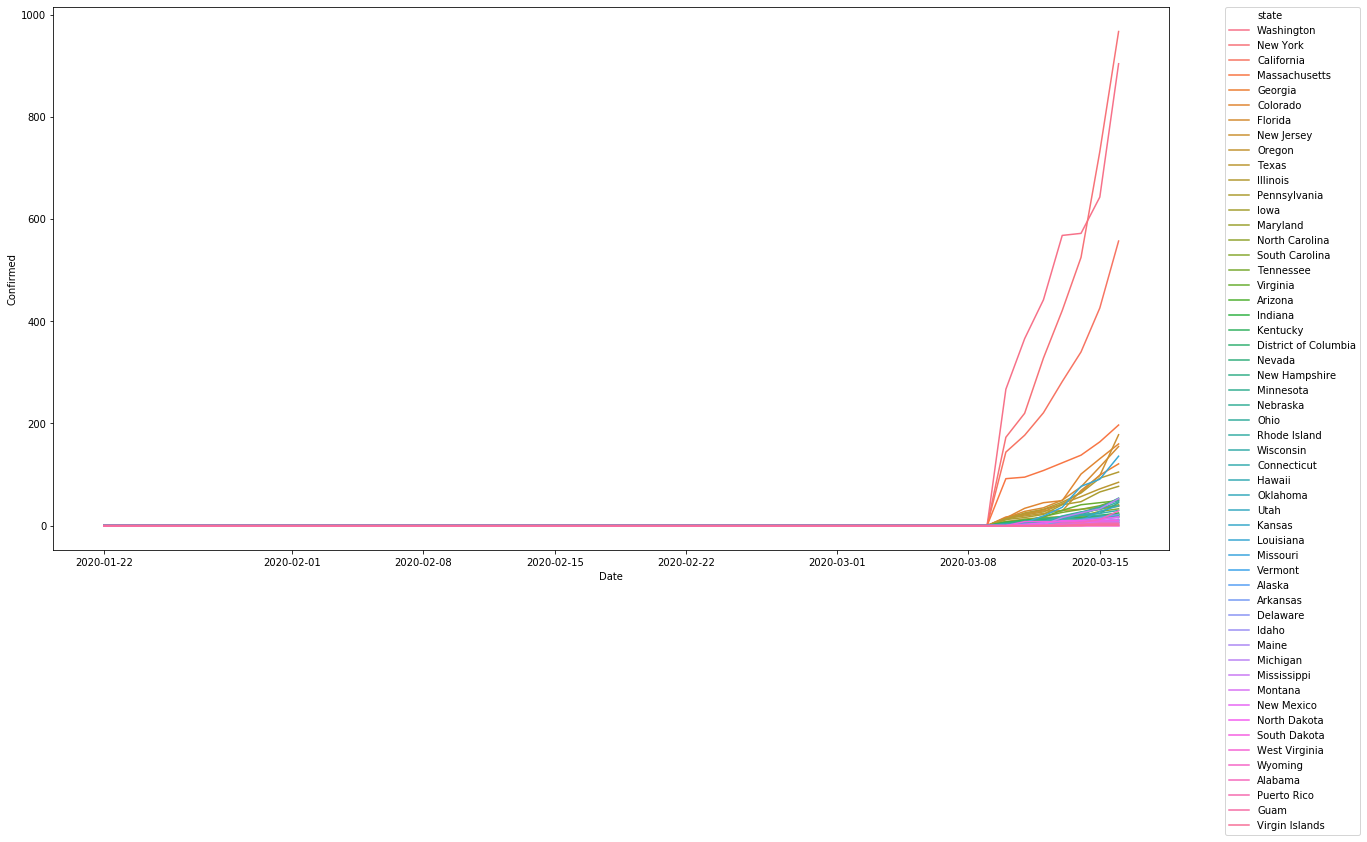

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
df = data_dict["all_data"]
df = df.loc[df["is_full_state"] == True]
sns.lineplot(x="Date", y="Confirmed", hue="state", data=df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)